In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split as tts

In [37]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [38]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [39]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

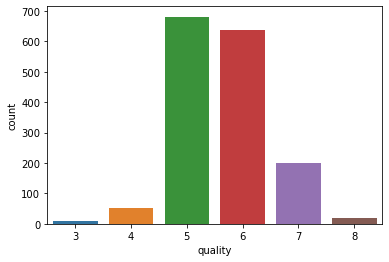

In [40]:
sns.countplot(df['quality'])

In [41]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [42]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [43]:
df.shape

(1599, 12)

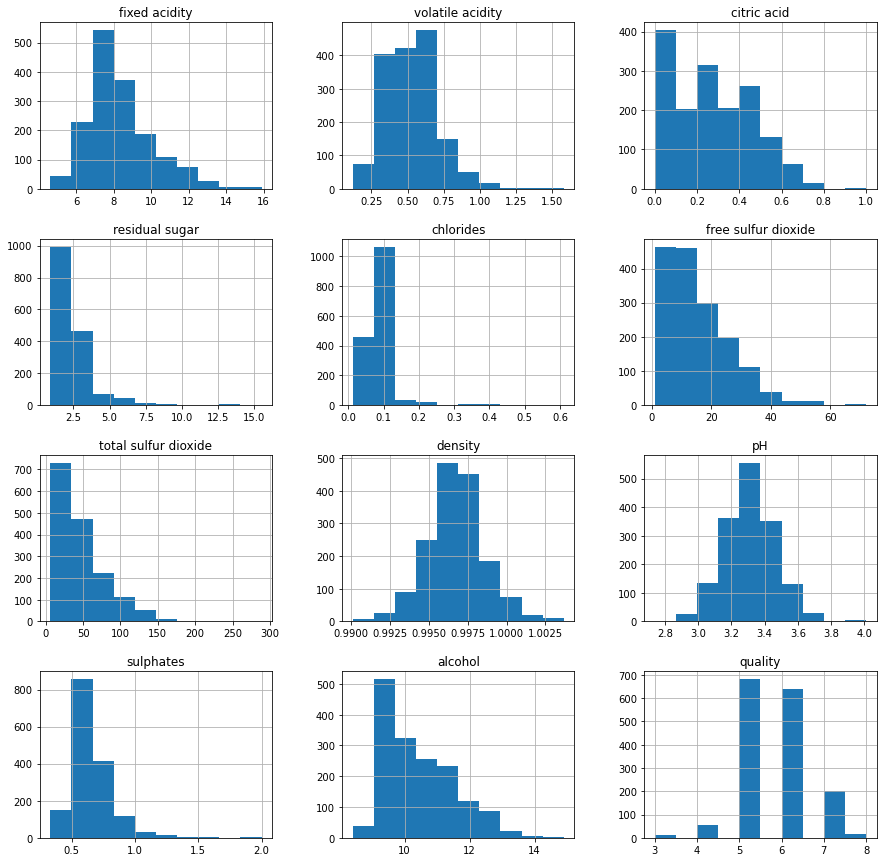

In [44]:
df.hist(figsize=(15,15))
plt.show()

<AxesSubplot:>

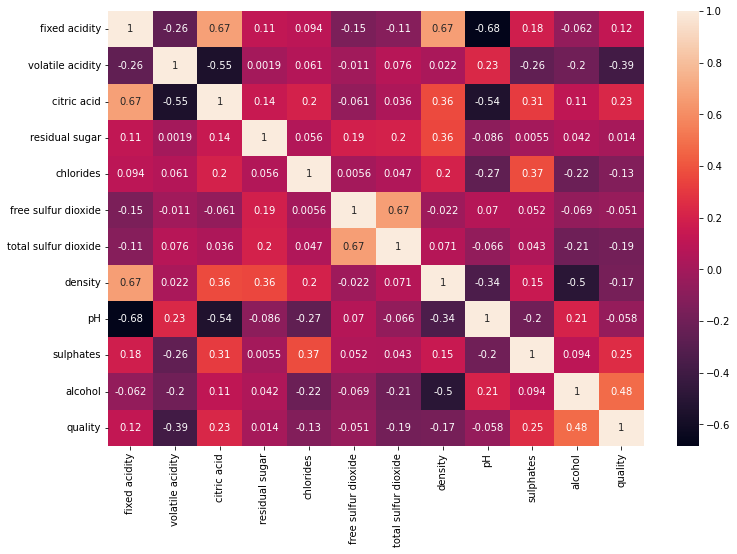

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

In [46]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

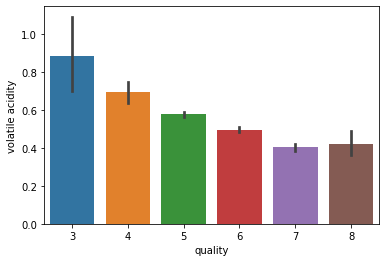

In [47]:
plt.figure9figsize=((10,10))
sns.barplot(data=df,x='quality', y='volatile acidity')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

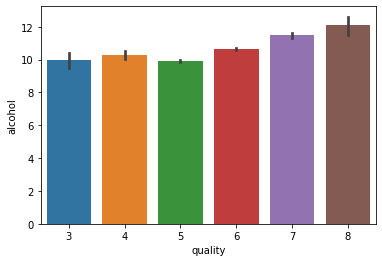

In [48]:
plt.figure9figsize=((10,10))
sns.barplot(data=df,x='quality', y='alcohol')

In [49]:
df['quality'] = df.quality.apply(lambda x:'good' if x>=7 else 'bad')

In [50]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [51]:
x = df.drop(columns='quality')
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [52]:
y = df['quality']
y.head(15)

0      bad
1      bad
2      bad
3      bad
4      bad
5      bad
6      bad
7     good
8     good
9      bad
10     bad
11     bad
12     bad
13     bad
14     bad
Name: quality, dtype: object

In [53]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.3,random_state=40)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(x_test)

In [57]:
comp_df = pd.DataFrame()

In [58]:
comp_df['Actual values'] = y_test
comp_df['Predicted values'] = y_pred

In [59]:
comp_df.head(15)

,Actual values,Predicted values
1035,good,bad
49,bad,bad
799,bad,bad
538,good,good
660,bad,bad
990,bad,bad
398,bad,bad
1068,good,bad
1155,bad,bad
468,bad,bad


In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test,y_pred)*100

87.08333333333333

In [62]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_test,y_pred)

array([[399,  12],
       [ 50,  19]], dtype=int64)

In [64]:
tp,fp,fn,tn=confusion_matrix(y_test,y_pred).ravel()
print(f"True Positive : {tp}\nFalse Positive : {fp}\nFalse Negative : {fn}\nTrue Negative : {tn}")

True Positive : 399
False Positive : 12
False Negative : 50
True Negative : 19


In [65]:
# Classification Report 
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.89      0.97      0.93       411
        good       0.61      0.28      0.38        69

    accuracy                           0.87       480
   macro avg       0.75      0.62      0.65       480
weighted avg       0.85      0.87      0.85       480

